# Linear Regressionn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Assumption checking (conditions to satisfy)
#### 1. Linearity (only with one column in a table)
#### 2. No multi-colenearity
#### 3. No auto-correlation (no realtion of a column with itself)
#### 4. No outliers
#### 5. No null values

### Checking the Linearity

<Axes: >

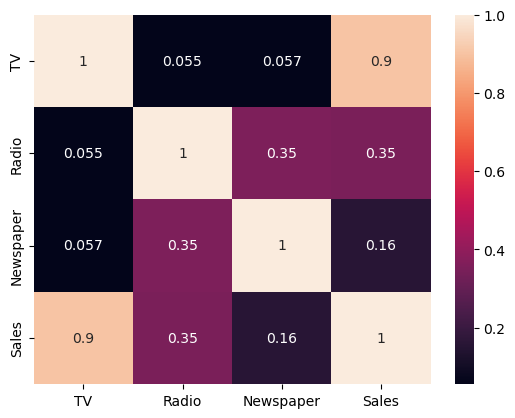

In [4]:
sns.heatmap(data.corr(), annot=True)

In [5]:
# According to heatmap, TV with sales is most colinear

### Checking the outliers and removing them

{'whiskers': [<matplotlib.lines.Line2D at 0x21f88da5410>,
 'caps': [<matplotlib.lines.Line2D at 0x21f88da7390>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f88da4d90>],
 'medians': [<matplotlib.lines.Line2D at 0x21f88db4b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f88db5590>],
 'means': []}

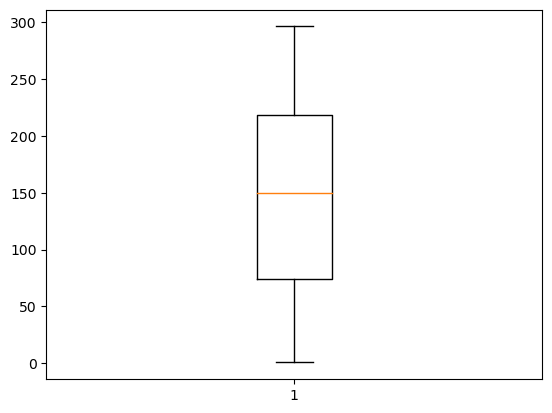

In [6]:
column = data["TV"]
plt.boxplot(column)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f88f46890>,
 'caps': [<matplotlib.lines.Line2D at 0x21f88f500d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f88f45d10>],
 'medians': [<matplotlib.lines.Line2D at 0x21f88f51750>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f88f51610>],
 'means': []}

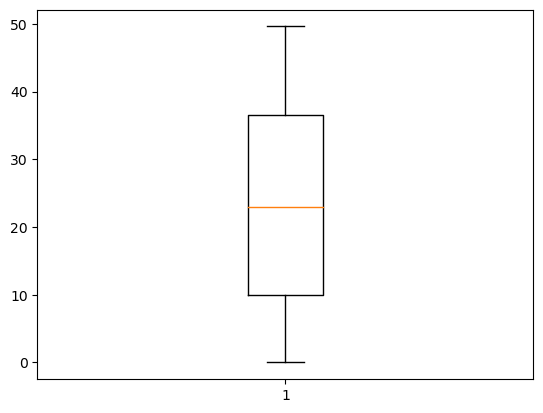

In [7]:
column = data["Radio"]
plt.boxplot(column)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f88faee50>,
 'caps': [<matplotlib.lines.Line2D at 0x21f88fb8750>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f88fae3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f88fb9e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f88fafa10>],
 'means': []}

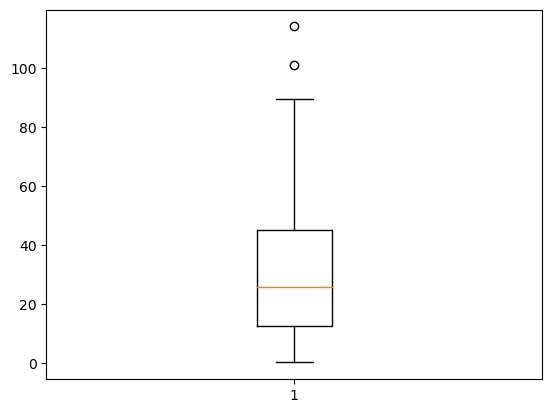

In [8]:
column = data["Newspaper"]
plt.boxplot(column)

In [9]:
# need to remove outliers in the data
data_new = data[data["Newspaper"] < 90]
data_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


{'whiskers': [<matplotlib.lines.Line2D at 0x21f88dcd950>,
 'caps': [<matplotlib.lines.Line2D at 0x21f88dcf050>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f88ff9dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f88de0810>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f88de0d50>],
 'means': []}

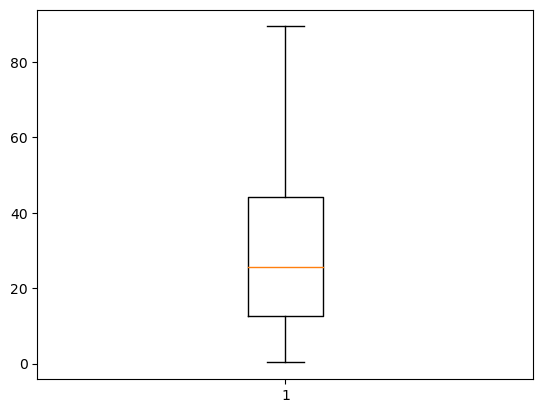

In [10]:
column = data_new["Newspaper"]
plt.boxplot(column)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f88e2bdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f88e394d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f88e0ed50>,
 'medians': [<matplotlib.lines.Line2D at 0x21f88e3abd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21f88e390d0>,
 'means': []}

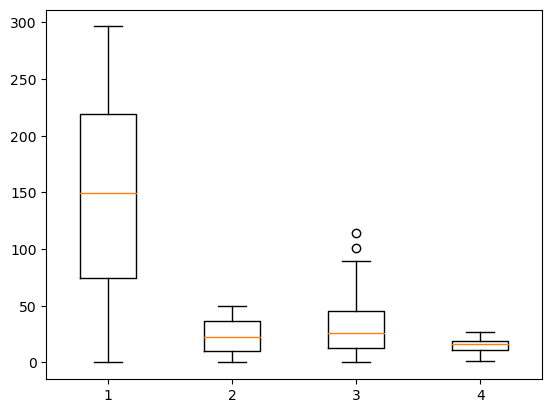

In [11]:
plt.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f8902c210>,
 'caps': [<matplotlib.lines.Line2D at 0x21f8902d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f88e99210>,
 'medians': [<matplotlib.lines.Line2D at 0x21f8902ecd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21f8901f550>,
 'means': []}

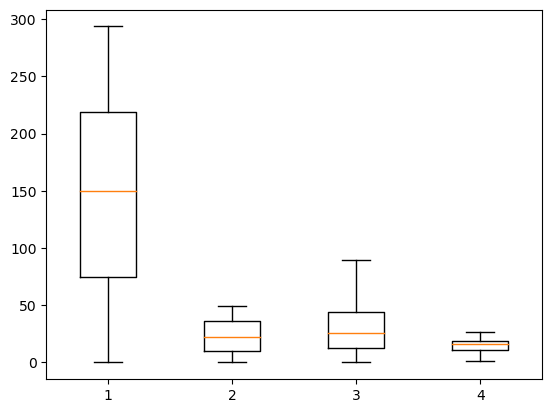

In [12]:
plt.boxplot(data_new)

In [13]:
data_new.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# Formula for Linear Regression
#   y   = b0 + b1.x1 + b2.x2 + b3.x3 ...... + bn.xn
# Sales = b0 + b1 'TV' + b2 'Radio' + b3 'Newspaper'

In [15]:
x = data_new[["TV","Radio","Newspaper"]]    # providing multiple elements as sequential datatype i.e list
y = data_new[["Sales"]]

In [16]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
data_new.shape

(198, 4)

In [18]:
x.shape

(198, 3)

In [19]:
y.shape

(198, 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8)

In [21]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(x_test.shape)

(158, 3)
(40, 3)

(158, 1)
(40, 3)


In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [23]:
lm.fit(x_train, y_train)

LinearRegression()

In [24]:
# y = b0 + b1x1 + b2x2 + b3x3

In [25]:
print(lm.coef_)

[[0.05386269 0.10520232 0.00511071]]


In [26]:
print(lm.intercept_)

[4.59412066]


<Axes: >

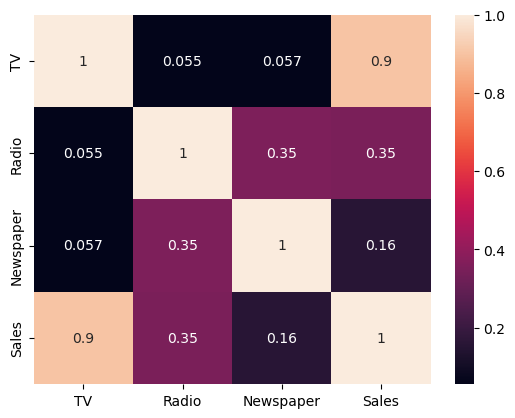

In [27]:
sns.heatmap(data.corr(),annot=True)

In [28]:
x1 =250
x2= 14
x3 = 67

y = 2.85645114 + (0.04713151*x1)+(0.17860138*x2)+(0.00258433*x3)

In [29]:
y

17.31289807

In [30]:
y_pred = lm.predict(x_test)

In [31]:
y_pred

array([[20.85835869],
       [15.15093128],
       [12.70301194],
       [24.20227073],
       [14.03494121],
       [ 7.85127804],
       [ 8.1550868 ],
       [12.24409698],
       [ 5.47263692],
       [15.65139434],
       [19.22248851],
       [20.83932736],
       [10.9413738 ],
       [13.14177306],
       [21.48007159],
       [10.97772589],
       [ 7.24970143],
       [ 9.36884137],
       [10.59042261],
       [ 7.11145173],
       [16.75693318],
       [13.34496266],
       [18.74894457],
       [16.87501616],
       [18.73515744],
       [19.54474801],
       [19.09398728],
       [20.81104661],
       [15.69017655],
       [ 8.87106744],
       [21.02894477],
       [11.35595444],
       [14.92799075],
       [19.18040195],
       [10.22487406],
       [17.39815029],
       [20.79024647],
       [12.32357099],
       [17.83935851],
       [17.99960201]])

In [32]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales']= y_test
new_df['predicted sales']= y_pred
new_df

,TV,Radio,Newspaper,actual sales,predicted sales
102,280.2,10.1,21.4,19.8,20.858359
87,110.7,40.6,63.2,16.0,15.150931
31,112.9,17.4,38.6,11.9,12.703012
17,281.4,39.6,55.8,24.4,24.202271
57,136.2,19.2,16.6,13.2,14.034941
172,19.6,20.1,17.0,7.6,7.851278
56,7.3,28.1,41.4,5.5,8.155087
151,121.0,8.4,48.7,11.6,12.244097
108,13.1,0.4,25.6,5.3,5.472637
118,125.7,36.9,79.2,15.9,15.651394


In [33]:
lm.score(x_train,y_train)*100

89.60122149512918

In [34]:
# from sklearn.metrics import r2_score,mean_squared_error
# import numpy as np

# r2=r2_score(y_test,y_pred)
# print("R-squared:",r2)

# rmse=np.sqrt(mean_squared_error(y_test,y_pred))
# print("RMSE:",rmse)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test,y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:", rmse)

R-squared: 0.9202100752927033
RMSE: 1.4884317574849517


In [37]:
# How to save the currently made ML model for future use
import joblib

In [38]:
joblib.dump(lm,"model.pkl")

['model.pkl']